In [4]:
!wget -O handwritten-data.zip "https://storage.googleapis.com/kaggle-data-sets/9726%2F17999%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594430725&Signature=nLHSdWDbL1VJvFKqprTGgrg3zqrl2AblOk3Of6UMZdwzmNULLGqy0j4W12kZcwApsZ5V32SY4NMZt4SKOgkkXSTRBXA2nsxgc71hmvDMs%2FGcUI6Jfuej2ZogI7u4cXGkZ3sylfQ%2B8Alm14zIcT88HvGEQua6zJ3O45h8fTfoso%2FqCaX5BOaoQq5xDFW%2FgYCOp%2BzXLFRjeE4OZoTND7IVEEdtfGxjmAdu8zK60KIktRJy6%2B38yR%2B6FBtKE6jg18Lq7P%2F%2FjCRxLp8dQQ6r4Y23FLkAA3J7mXWLsPy7JBkiVHxMMX6REGUPzZnmBN%2BkjExGNQsTLRTJtITRRmeSjvqx5A%3D%3D" 
!unzip handwritten-data.zip

--2020-07-08 11:23:10--  https://storage.googleapis.com/kaggle-data-sets/9726%2F17999%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594430725&Signature=nLHSdWDbL1VJvFKqprTGgrg3zqrl2AblOk3Of6UMZdwzmNULLGqy0j4W12kZcwApsZ5V32SY4NMZt4SKOgkkXSTRBXA2nsxgc71hmvDMs%2FGcUI6Jfuej2ZogI7u4cXGkZ3sylfQ%2B8Alm14zIcT88HvGEQua6zJ3O45h8fTfoso%2FqCaX5BOaoQq5xDFW%2FgYCOp%2BzXLFRjeE4OZoTND7IVEEdtfGxjmAdu8zK60KIktRJy6%2B38yR%2B6FBtKE6jg18Lq7P%2F%2FjCRxLp8dQQ6r4Y23FLkAA3J7mXWLsPy7JBkiVHxMMX6REGUPzZnmBN%2BkjExGNQsTLRTJtITRRmeSjvqx5A%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘handwritten-data.zip’

handwritten-data.zi 100%[===================>] 184.67M   114MB/s    in 1.6s    

2020-0

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D #convolution layer
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # evaluate the accuracy

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [5]:
dataset = pd.read_csv("./A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Split input and target
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [6]:
print("shape:",X.shape)

shape: (372450, 784)


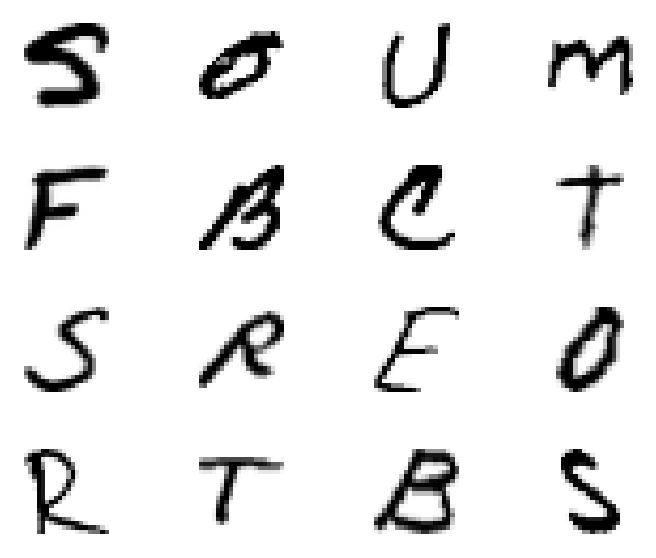

In [7]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.axis('off')
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


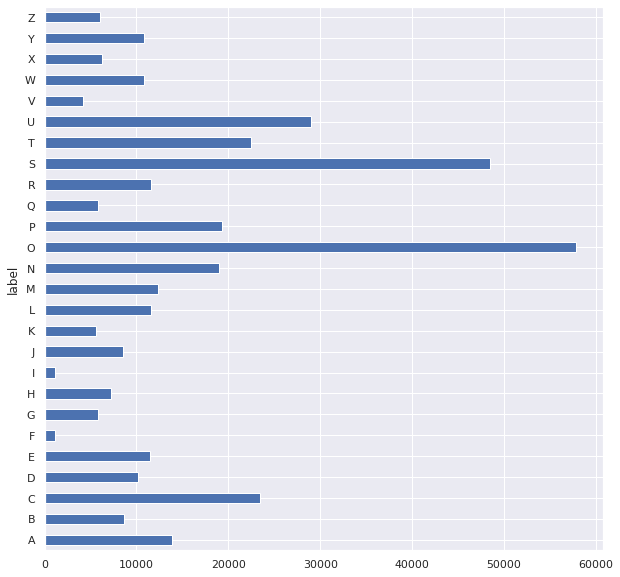

In [8]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

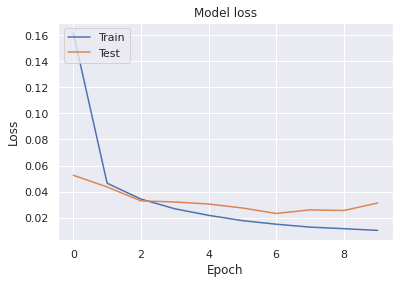

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Data after scaler


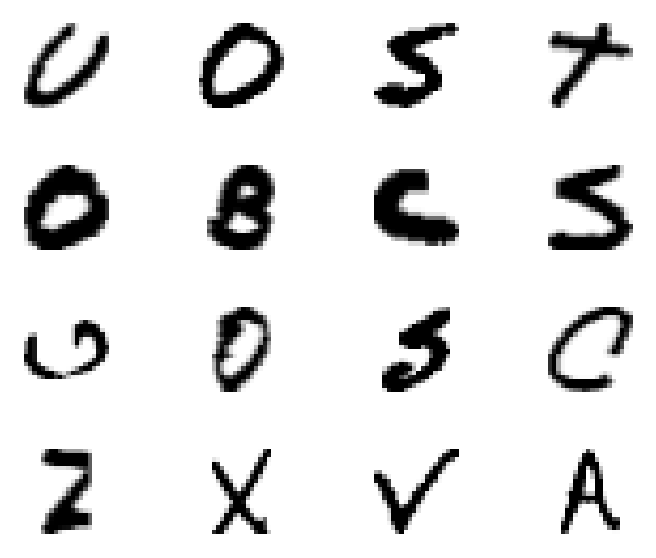

In [10]:
# splite the data, X:0~255
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 映射到0~1
standard_scaler = MinMaxScaler()
standard_scaler.fit(X)

X_train = standard_scaler.transform(X_train) 
X_test = standard_scaler.transform(X_test)

print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.axis('off')
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
num_classes = y_test.shape[1] 
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same")) # input and convolution layer
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling layer
# hidden
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same")) # the second convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2)) # dropout layer

model.add(Flatten()) # 2d to 1d
model.add(Dense(128, activation='relu')) # density layer
model.add(Dense(num_classes, activation='softmax')) # output layer 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

model.save('model.kmd')

Train on 279337 samples, validate on 93113 samples
Epoch 1/10
 - 84s - loss: 0.1619 - accuracy: 0.9539 - val_loss: 0.0525 - val_accuracy: 0.9863
Epoch 2/10
 - 77s - loss: 0.0464 - accuracy: 0.9869 - val_loss: 0.0435 - val_accuracy: 0.9886
Epoch 3/10
 - 77s - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9911
Epoch 4/10
 - 78s - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0320 - val_accuracy: 0.9913
Epoch 5/10
 - 78s - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0304 - val_accuracy: 0.9917
Epoch 6/10
 - 77s - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0274 - val_accuracy: 0.9935
Epoch 7/10
 - 77s - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0232 - val_accuracy: 0.9940
Epoch 8/10
 - 78s - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0260 - val_accuracy: 0.9939
Epoch 9/10
 - 77s - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0254 - val_accuracy: 0.9952
Epoch 10/10
 - 77s - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0312 - val_accuracy: 0.9932
CNN Erro

In [14]:
model.predict(X_test[0:1])

array([[1.9339702e-25, 5.9846655e-21, 1.1034298e-14, 8.2828047e-22,
        1.0637664e-10, 8.3256237e-13, 7.8556063e-08, 2.2882483e-20,
        2.0886192e-23, 6.8959899e-12, 8.0953115e-16, 5.3915934e-15,
        5.1271700e-26, 1.7887384e-26, 3.2863614e-15, 4.1364439e-25,
        3.1279374e-21, 6.1969227e-26, 9.9999988e-01, 1.1655680e-17,
        7.2705164e-19, 7.4842321e-22, 1.1516607e-22, 1.2421141e-17,
        6.9089042e-16, 3.0098808e-14]], dtype=float32)

In [15]:
from keras.models import load_model
new_model = load_model('model.kmd')

In [16]:
k = new_model.predict(X_test[0].reshape((1, 28, 28, 1)))

In [ ]:
X_test[0].reshape((1, 28, 28, 1)).shape

(1, 28, 28, 1)

In [ ]:
import os
from skimage import io
import torchvision.datasets.mnist as mnist
import numpy 
def convert_to_img():
    root = './data'
    data_path = root + '/train/'
    if(not os.path.exists(data_path)):
        os.makedirs(data_path)
    for i, img in enumerate(X_test):
        x = img * 255
        x.reshape((28, 28));
        x.astype('int')
        img_path = data_path + str(i) + '.jpg'
        io.imsave(img_path, x)
        if i > 30:
            break
convert_to_img()